# CA1: Dataframe Manipulation with Spotify Data

## Introduction
Pandas is an extremely powerful tool to handle large amounts of tabular data. In this compulsory assignment, you will use Pandas to explore one of the TA's personal spotify data in depth. \
\
Additional information:
- Feel free to create additional code cells if you feel that one cell per subtask is not sufficient.
- Remember, Pandas uses very efficient code to handle large amounts of data. For-loops are not efficient. If you ever have to use a for-loop to loop over the rows in the DataFrame, you have *probably* done something wrong.
- Label all graphs and charts if applicable.

## Task
I typically enjoy indie and rock music. I am a big fan of everything from old-fashioned rock and roll like Led Zeppelin and Jimi Hendrix, to newer indie artists like Joji and Lana Del Rey. This is why my spotify wrapped for 2023 came as quite a surprise:

<img src="spotifywrapped.PNG" alt="Image Description" width="20%">


Now, I'm no hater of pop music, but this was unexpected. 
For this assignment, you will investigate my listening habits, including a deep dive into my Ariana Grande listening habits, and try to find an answer to why she was my top artist; was there a fault in the spotify algorithm? Am I actually secretly an *Arianator*? (yes, I did have to look that up). Or am I just lying to myself about how often I listen to guilty pleasure music?

## Part 1: Initial loading and exploration

#### 1.0 Import necessary libraries: 
pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0

In [1]:
import matplotlib.pyplot as plt
# ---- Insert other imports ----
import pandas as pd
import glob
import numpy as np

#### 1.1 Loading the data
Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.

In [2]:
df_spotify_0 = pd.read_csv('spotify_data/streaminghistory0.csv')

#### 1.2 Help function
Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.

In [3]:
help(pd.DataFrame.head)
help(pd.DataFrame.tail)

Help on function head in module pandas.core.generic:

head(self, n: 'int' = 5) -> 'Self'
    Return the first `n` rows.

    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.

    For negative values of `n`, this function returns all rows except
    the last `|n|` rows, equivalent to ``df[:n]``.

    If n is larger than the number of rows, this function returns all rows.

    Parameters
    ----------
    n : int, default 5
        Number of rows to select.

    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.

    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.

    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     

#### 1.3 Getting an overview
Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset. 

In [4]:
print(df_spotify_0.head())

print(df_spotify_0.tail(10))

            endTime            artistName                        trackName  \
0  2022-12-03 02:02  Cigarettes After Sex                            Truly   
1  2022-12-03 02:02         Leonard Cohen  Take This Waltz - Paris Version   
2  2022-12-06 21:05          Vlad Holiday                 So Damn Into You   
3  2022-12-06 21:05                 Lorde                             Team   
4  2022-12-06 21:05         Ariana Grande                         Into You   

   msPlayed  
0   30000.0  
1    8210.0  
2   37895.0  
3    8984.0  
4    1221.0  
                endTime         artistName                     trackName  \
11949  2023-01-02 20:58      Ariana Grande                    six thirty   
11950  2023-01-02 20:58      Leonard Cohen          Thanks for the Dance   
11951  2023-01-02 20:59           Des Rocs          Used to the Darkness   
11952  2023-01-02 20:59  Caroline Polachek         Hit Me Where It Hurts   
11953  2023-01-02 20:59  Caroline Polachek         Hit Me Where It 

#### 1.4 Formatting correctly
When working with Pandas, it's very useful to have columns which contains dates in a specific format called *datetime*. This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.

In [5]:
df_spotify_0['endTime'] = pd.to_datetime(df_spotify_0['endTime'], utc=True)
print(df_spotify_0.head())

                    endTime            artistName  \
0 2022-12-03 02:02:00+00:00  Cigarettes After Sex   
1 2022-12-03 02:02:00+00:00         Leonard Cohen   
2 2022-12-06 21:05:00+00:00          Vlad Holiday   
3 2022-12-06 21:05:00+00:00                 Lorde   
4 2022-12-06 21:05:00+00:00         Ariana Grande   

                         trackName  msPlayed  
0                            Truly   30000.0  
1  Take This Waltz - Paris Version    8210.0  
2                 So Damn Into You   37895.0  
3                             Team    8984.0  
4                         Into You    1221.0  


#### 1.5 Unique artists
Find how many unique artists are in the dataset.


In [6]:
len(df_spotify_0['artistName'].unique())

495

#### 1.6 Unique songs
Find how many unique songs are in the dataset.

In [7]:
len(df_spotify_0['trackName'].unique())

1308

### Part 1: Questions
Q1: Which columns are in the dataset?
    endTime, artistName, trackName, and msPlayed
Q2: What timeframe does the dataset span?

Q3: How many unique artists are in the dataset?
    495

Q4: How many unique songs are in the dataset?
    1308

## Part 2: Working with all the data

#### 2.0 Importing all the dataframes
In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth. 

In the *spotify_data* folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.

In [8]:
files = glob.glob('spotify_data/*.csv')
dfs = [pd.read_csv(file) for file in files]
df = pd.concat(dfs, ignore_index=True)

#### 2.1 Sorting by time
Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.

In [9]:

df = df.sort_values(by='endTime')


#### 2.2 Setting a timeframe
For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.

In [10]:
df['endTime'] = pd.to_datetime(df['endTime'], utc=True)
df = df[df['endTime'].dt.year == 2023]

#### 2.3 Deleting rows
Often in Data Science, you will encounter when a row entry has the value *NaN*, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values. \
Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as *data imputation*. Here, though, you are just supposed to delete the entire rows with missing data.

In [11]:
df = df.dropna()

#### 2.4 Convert from milliseconds to seconds
From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.

In [12]:
df['secPlayed'] = df['msPlayed'] / 1000
df = df.drop(columns=['msPlayed'], axis=1)
df.head()

,endTime,artistName,trackName,secPlayed
94594,2023-01-01 01:17:00+00:00,Ariana Grande,7 rings,0.139
94595,2023-01-01 01:17:00+00:00,Ariana Grande,7 rings,0.487
94596,2023-01-01 01:17:00+00:00,Ariana Grande,positions,0.417
94597,2023-01-01 01:17:00+00:00,Peach Pit,Being so Normal,2.205
94598,2023-01-01 01:17:00+00:00,Kelly Clarkson,"Santa, Can’t You Hear Me",0.278


#### 2.5 Finding top 10 favorite artists
Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph. \
(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)

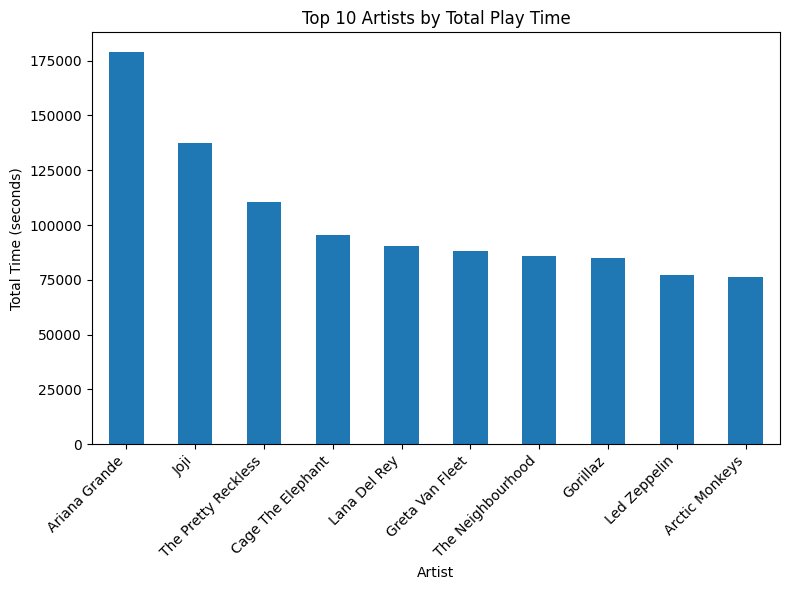

In [13]:
# Group by artist and sum the seconds played
top_artists = df.groupby('artistName')['secPlayed'].sum()

# Sort in descending order and get top 10
top_10 = top_artists.sort_values(ascending=False).head(10)


plt.figure(figsize=(8, 6))
top_10.plot(kind='bar')
plt.title('Top 10 Artists by Total Play Time')
plt.xlabel('Artist')
plt.ylabel('Total Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 2.6 Finding top 10 favorite songs
Find the top `ten` songs with the highest play time. Create a graph visualizing the results.



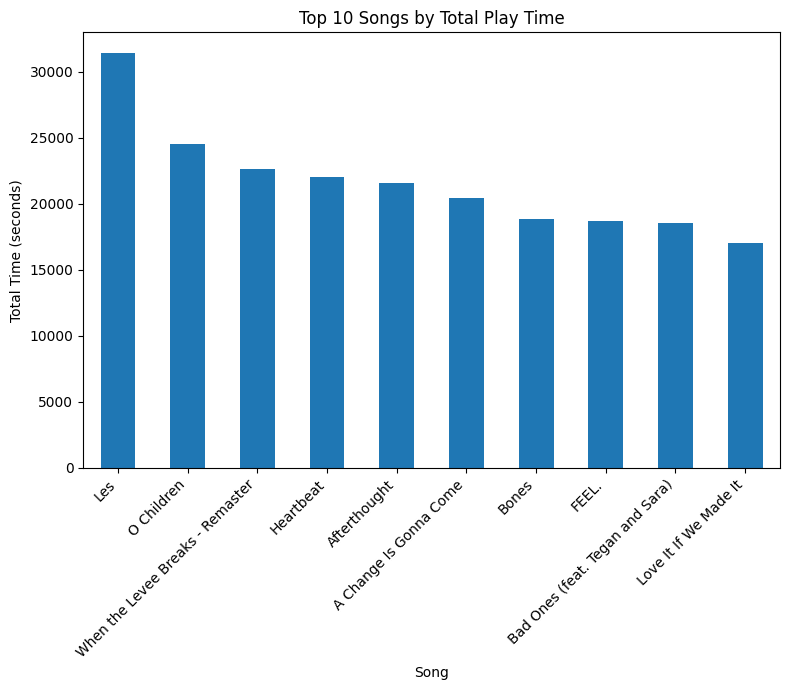

In [14]:
# Group by trackName and sum the seconds played
top_songs = df.groupby('trackName')['secPlayed'].sum()

# Sort in descending order and get top 10
top_10_songs = top_songs.sort_values(ascending=False).head(10)


plt.figure(figsize=(8, 7))
top_10_songs.plot(kind='bar')
plt.title('Top 10 Songs by Total Play Time')
plt.xlabel('Song')
plt.ylabel('Total Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Part 3: Further analysis

#### 3.0 Average listening time by hour
Generate a plot that displays the average amount of time that music is played for each hour of the day.

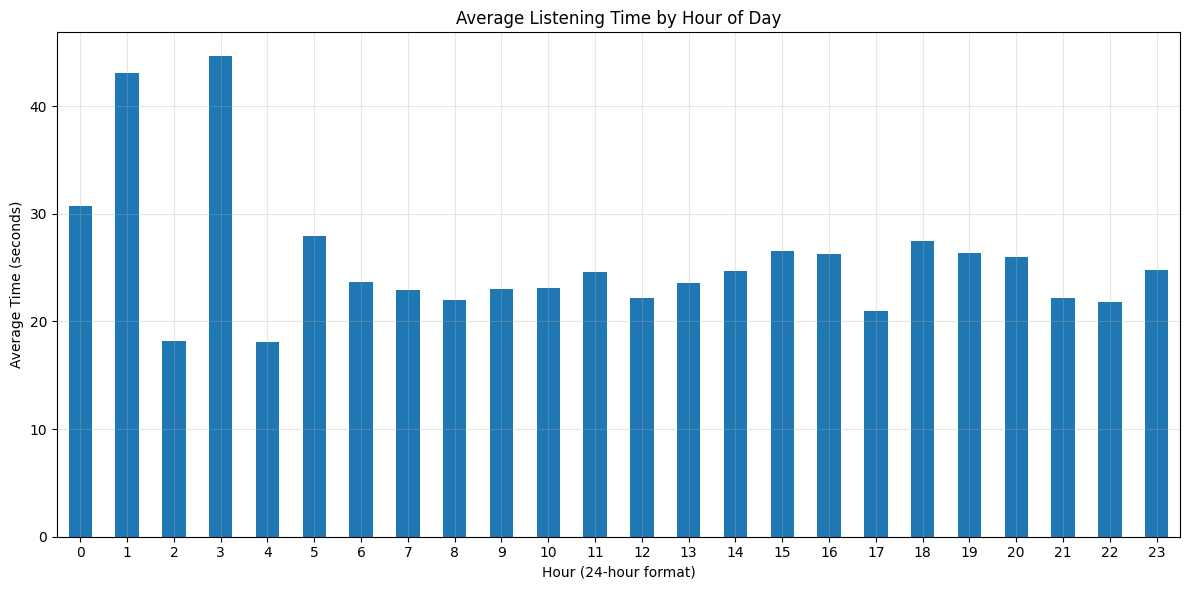

In [15]:
df['hour'] = df['endTime'].dt.hour
hourly_avg = df.groupby('hour')['secPlayed'].mean()


plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='bar')
plt.title('Average Listening Time by Hour of Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Average Time (seconds)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 3.1 Morning music and evening music
I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists *Leonard Cohen* and *Rage Against the Machine* on an hour-by-hour basis. See if there are any differences.

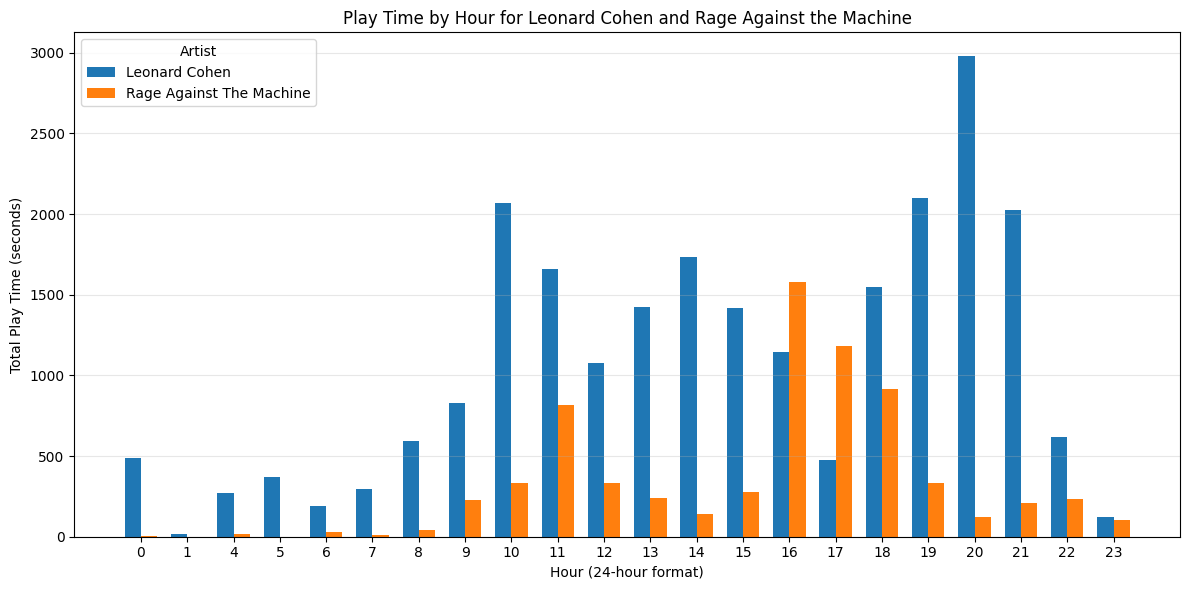

In [16]:
df_filtered = df[df['artistName'].isin(['Leonard Cohen', 'Rage Against The Machine'])]
hourly_playtime = df_filtered.groupby(['hour', 'artistName'])['secPlayed'].sum().unstack(fill_value=0)

# Plot configuration
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(hourly_playtime.index))

# Plot bars for each artist
plt.bar(x - bar_width/2, hourly_playtime['Leonard Cohen'], bar_width, label='Leonard Cohen')
plt.bar(x + bar_width/2, hourly_playtime['Rage Against The Machine'], bar_width, label='Rage Against The Machine')

# Customize plot
plt.title('Play Time by Hour for Leonard Cohen and Rage Against the Machine')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Total Play Time (seconds)')
plt.xticks(ticks=x, labels=hourly_playtime.index, rotation=0)
plt.legend(title='Artist')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### 3.2 Analysing skipped songs
Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to. \
 Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.

In [17]:
df['Listened'] = np.where(df['secPlayed'] >= 30, 1, 0)

#### 3.3 Plotting skipped songs
Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.

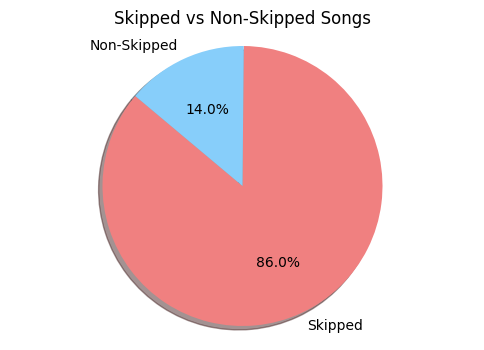

In [18]:
skipped_count = len(df[df['Listened'] == 0])
non_skipped_count = len(df[df['Listened'] == 1])

labels = ['Skipped', 'Non-Skipped']
sizes = [skipped_count, non_skipped_count]
colors = ['lightcoral', 'lightskyblue']

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Skipped vs Non-Skipped Songs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()

#### 3.4 Artists by percentage of songs skipped
For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`\
\
**Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$

In [19]:
df_skipped = round(( df.groupby('artistName')['Listened'].sum() ) / ( df.groupby('artistName')['artistName'].count() ) * 100)

grouped = df.groupby('artistName')
total_songs = grouped.size()
skipped = grouped['Listened'].sum()
skip_rate = round((skipped / total_songs * 100),2)

df_skipped = pd.DataFrame({
    'Artist': total_songs.index,
    'TotalSongs': total_songs.values,
    'SkippedSongs': skipped,
    'SkipRate': skip_rate.values
})

df_skipped.head()

,Artist,TotalSongs,SkippedSongs,SkipRate
artistName,,,,
10cc,10cc,28,9,32.14
2Pac,2Pac,513,71,13.84
3 Doors Down,3 Doors Down,2,1,50.00
4 Non Blondes,4 Non Blondes,122,34,27.87
50 Cent,50 Cent,28,9,32.14


#### 3.5 Comparing artists by skip-rate 
Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.

In [20]:
# Sort by SkipRate to find lowest and highest skip rates
lowest_skip_rate = df_skipped.nsmallest(3, 'SkipRate')
highest_skip_rate = df_skipped.nlargest(3, 'SkipRate')

# Print results
print("Three Artists with Lowest Skip-Rate:")
print(lowest_skip_rate[['Artist', 'SkipRate']])

print("\nThree Artists with Highest Skip-Rate:")
print(highest_skip_rate[['Artist', 'SkipRate']])


Three Artists with Lowest Skip-Rate:
                              Artist  SkipRate
artistName                                    
A Problem Squared  A Problem Squared       0.0
Acid Ghost                Acid Ghost       0.0
Albert Hammond Jr  Albert Hammond Jr       0.0

Three Artists with Highest Skip-Rate:
                      Artist  SkipRate
artistName                            
Gloria Gaynor  Gloria Gaynor    100.00
Roc Boyz            Roc Boyz     88.89
LACES                  LACES     85.71


## Part 4: God Is a Data Scientist - The Ariana Deep-Dive

#### 4.0 Ariana-DataFrame: 
Create a new DataFrame called *df_ariana*, containing only rows with music by Ariana Grande.

In [21]:
df_ariana = df[df['artistName'] == 'Ariana Grande']
df.tail()

,endTime,artistName,trackName,secPlayed,hour,Listened
155475,2023-12-07 21:13:00+00:00,Lana Del Rey,Art Deco,38.298,21,1
155476,2023-12-07 21:13:00+00:00,Ariana Grande,off the table (with The Weeknd),13.448,21,0
155477,2023-12-07 21:14:00+00:00,Ariana Grande,my hair,23.757,21,0
155478,2023-12-07 21:14:00+00:00,Leonard Cohen,Thanks for the Dance,9.317,21,0
155479,2023-12-07 21:17:00+00:00,The Vaccines,Your Love Is My Favourite Band,14.661,21,0


#### 4.1 Average skip rate
Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other. \
\
Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?

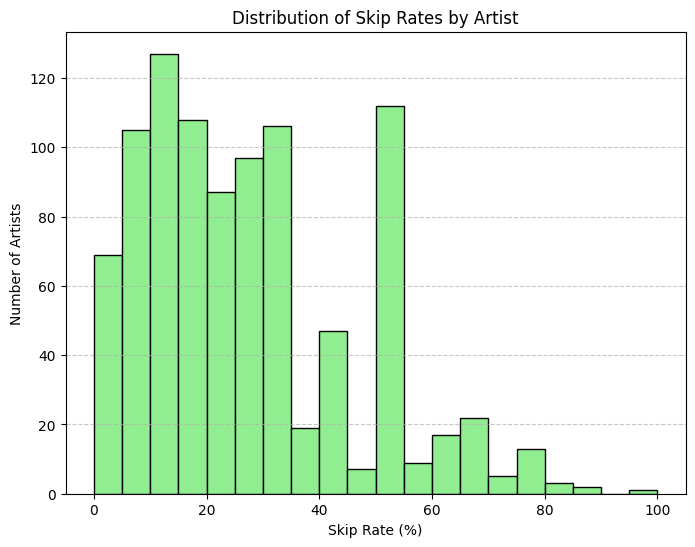

artistName
Ariana Grande    0.47
Name: SkipRate, dtype: float64


In [22]:
bin_edges = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = ['10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
df_skipped['SkipRateBin'] = pd.cut(df_skipped['SkipRate'], bins=bin_edges, labels=bin_labels)

# Count number of artists in each bin
artist_counts = df_skipped['SkipRateBin'].value_counts(sort=False)

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
plt.hist(df_skipped['SkipRate'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Skip Rates by Artist')
plt.xlabel('Skip Rate (%)')
plt.ylabel('Number of Artists')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


rate = df_skipped[df_skipped['Artist'] == 'Ariana Grande']['SkipRate']
print(rate)

### Part 4: Questions
Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset? \
    Very low skip rate, 0.47% There are 60 other in the 0-10% skip rate range, but most are above.
Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist?
    Very low skip rate, and high song number means very high minute count